In [1]:

import torch
import scanpy as sc
import pandas as pd
import scipy.sparse as sp
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scvi
from skmisc.loess import loess
import seaborn as sns


#import torchmetrics
#import pytorch_lightning

C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
C:\Users\D_F\miniconda3\envs\sc_solo_env\Lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_mtx from `annda

In [2]:
adata = sc.read_h5ad("updated_annotated_adata.h5ad")
adata

AnnData object with n_obs × n_vars = 56037 × 2000
    obs: 'sample_id', 'region', 'brain_region', 'batch', 'donor_id', 'braak_stage', 'sex', 'age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'n_genes', 'solo_doublet', 'solo_singlet', '_scvi_batch', '_scvi_labels', 'supercluster_name', 'cell_type'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_mean_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg'
    obsm: 'X_scVI'

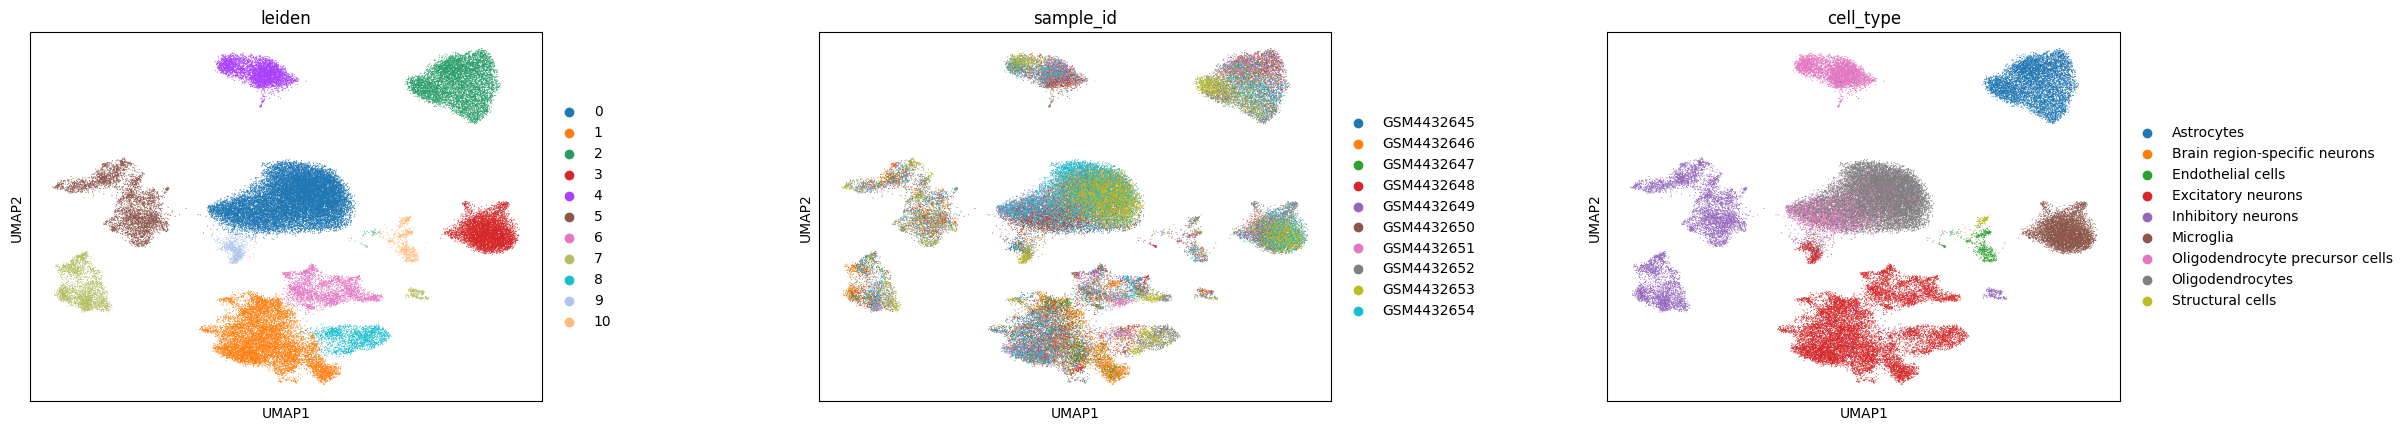

In [5]:
sc.pp.neighbors(adata, use_rep="X_scVI", n_neighbors=15)

# Step 1: Run Leiden clustering
sc.tl.leiden(adata, resolution=0.4, key_added="leiden")

# Step 2 (Optional): Rename clusters to something more descriptive later if needed

# Step 3: Visualize clusters on UMAP
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden", "sample_id"], wspace=0.4)


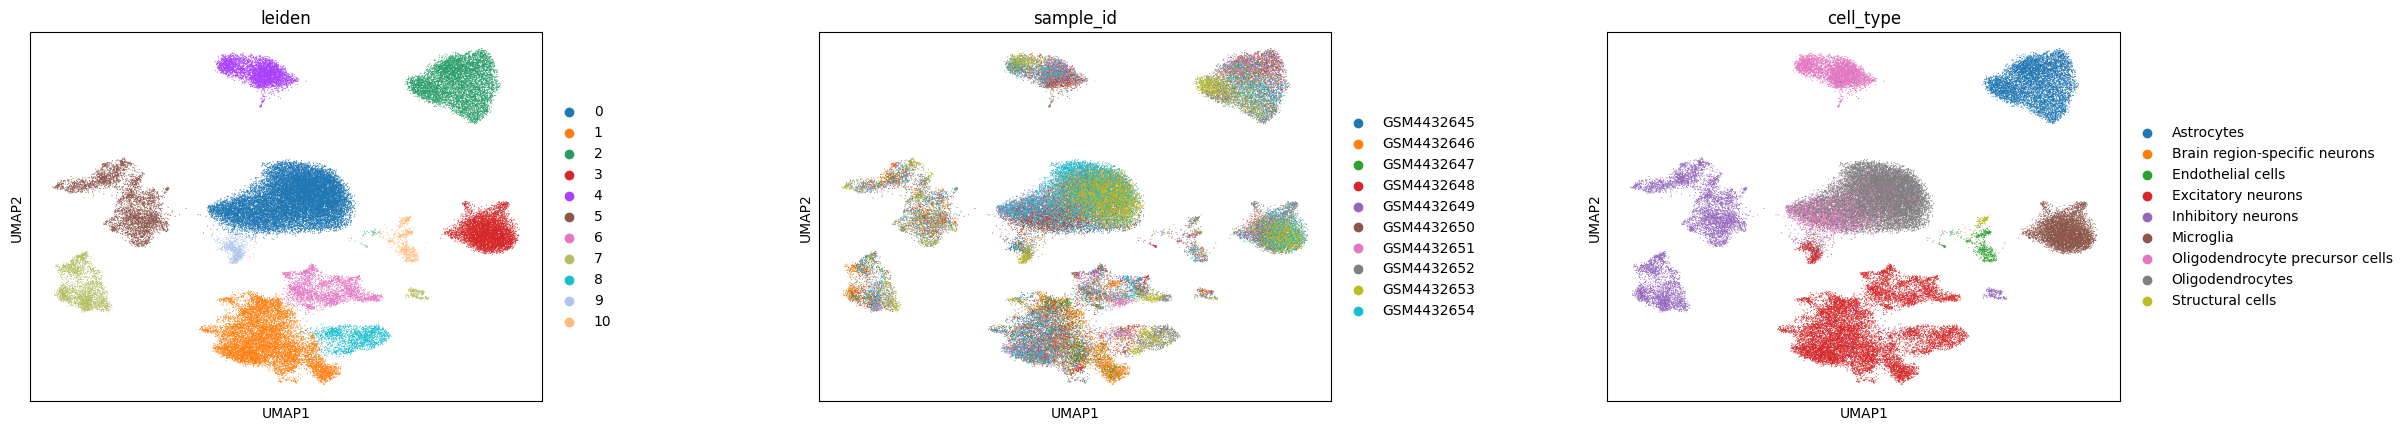

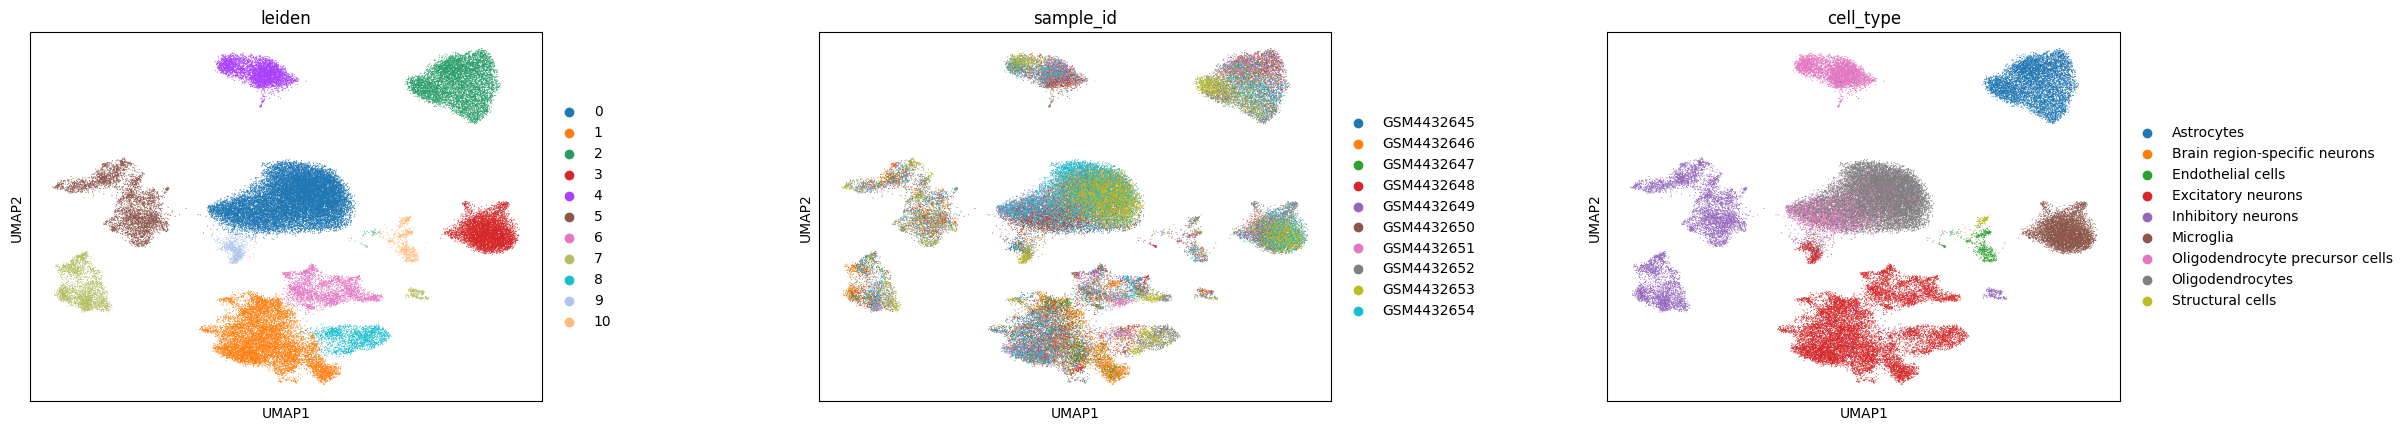

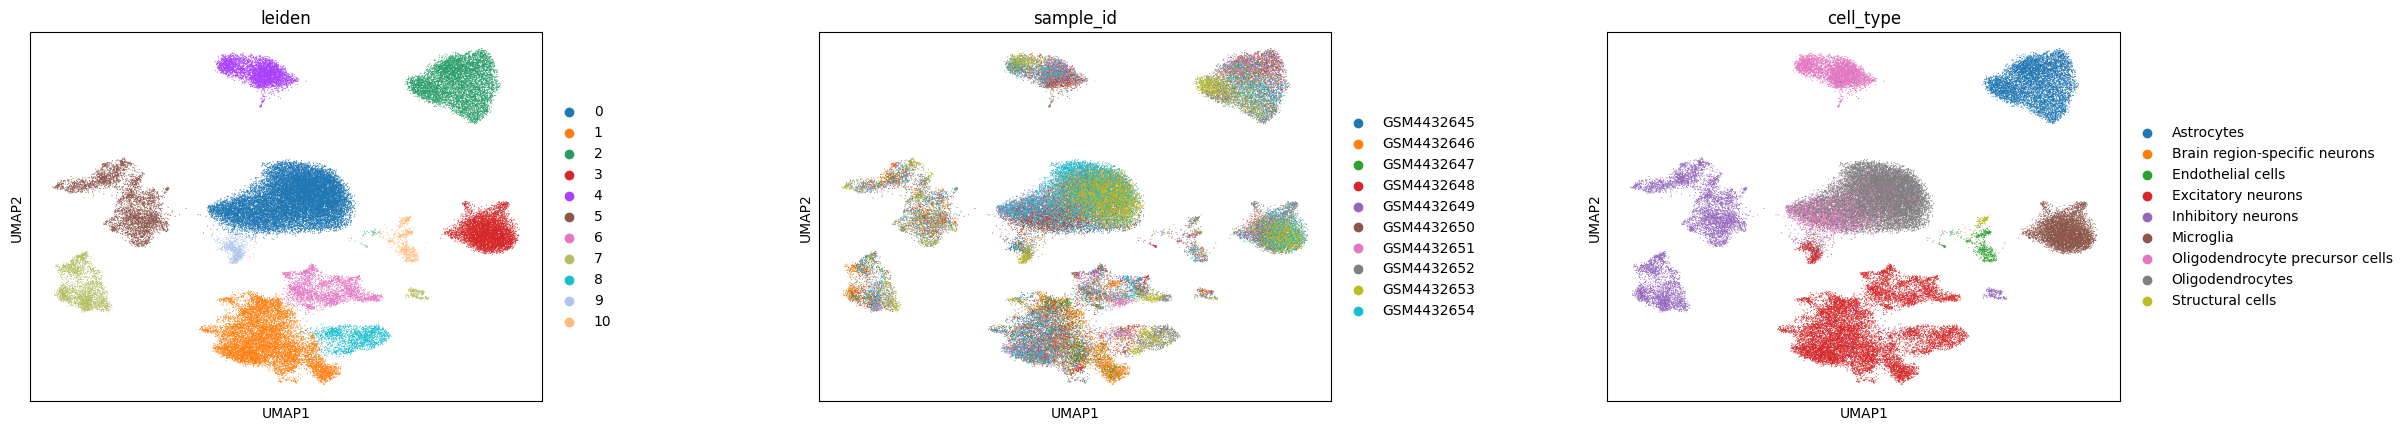

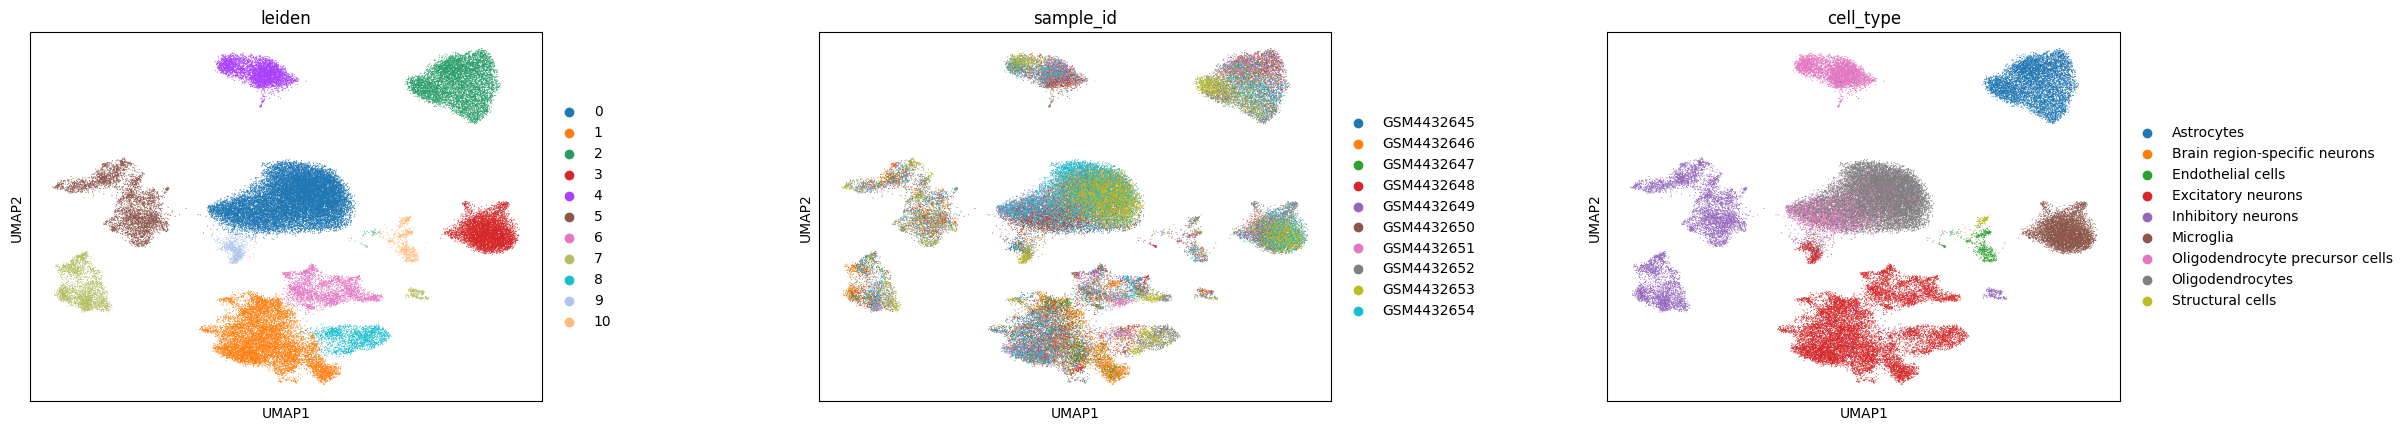

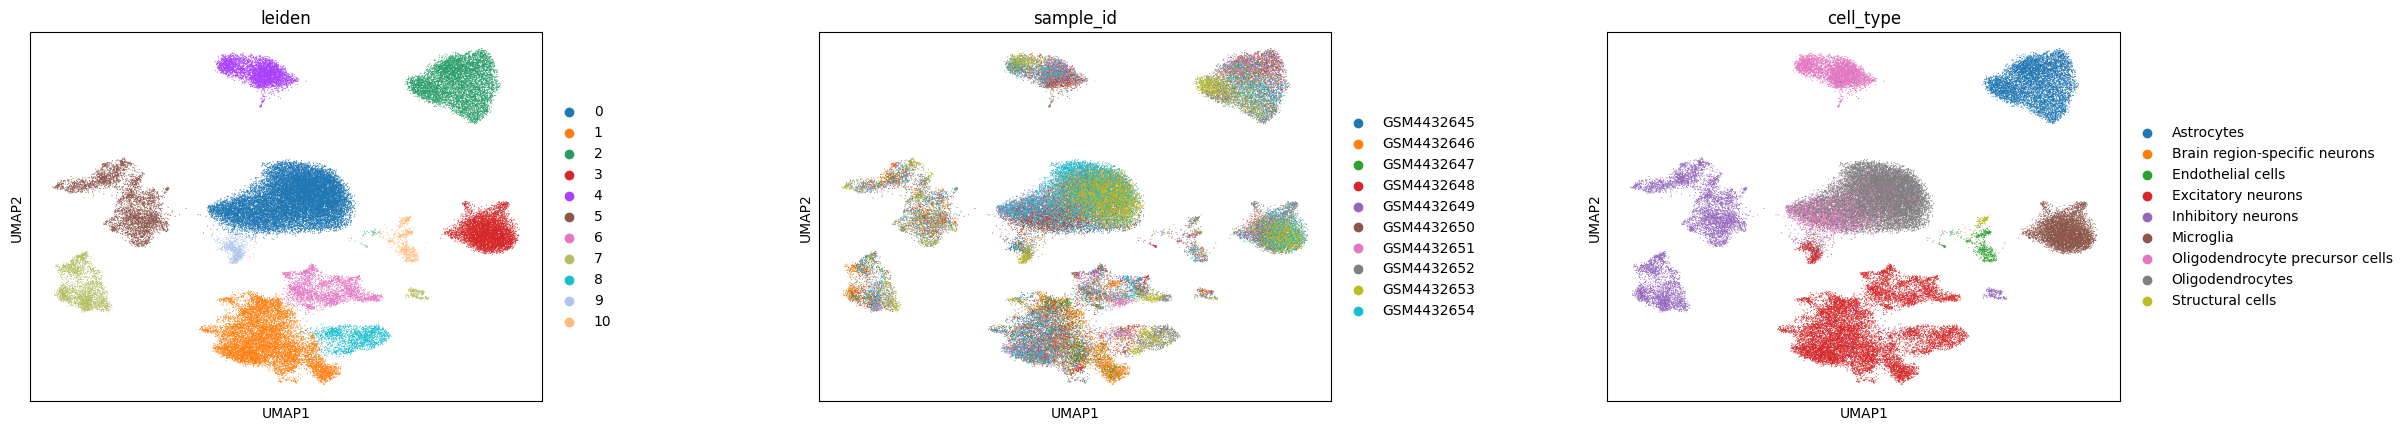

In [6]:
for res in [0.2, 0.4, 0.6, 0.8, 1.0]:
    sc.tl.leiden(adata, resolution=res, key_added=f"leiden_r{res}")
    sc.tl.umap(adata)
    sc.pl.umap(adata, color=["leiden", "sample_id", "cell_type"], wspace=0.4)

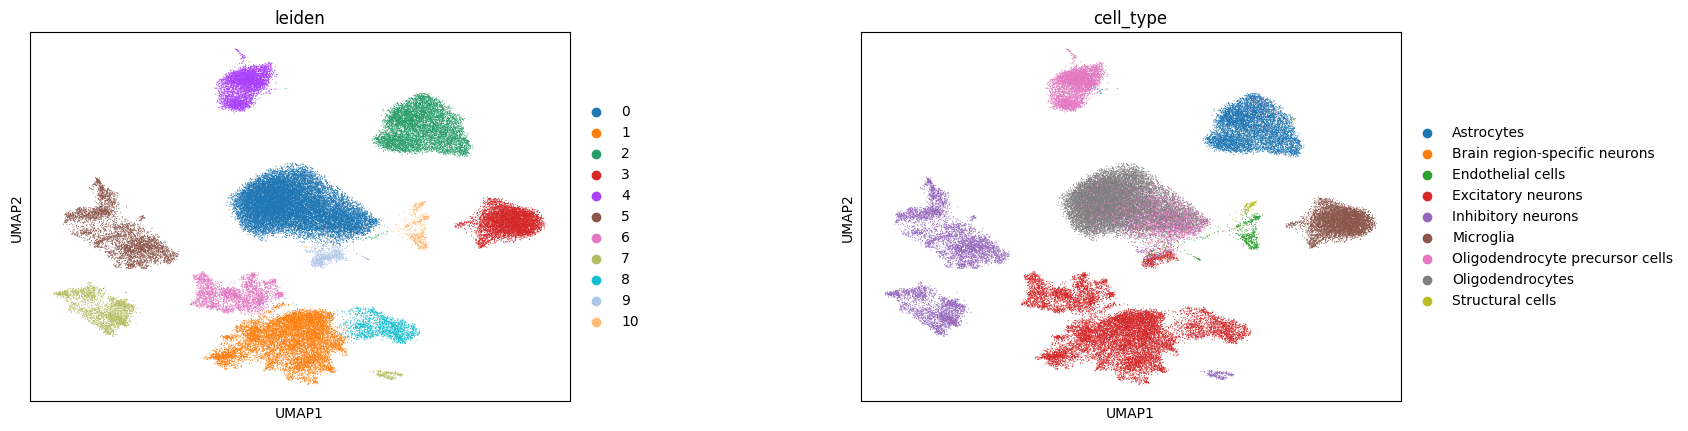

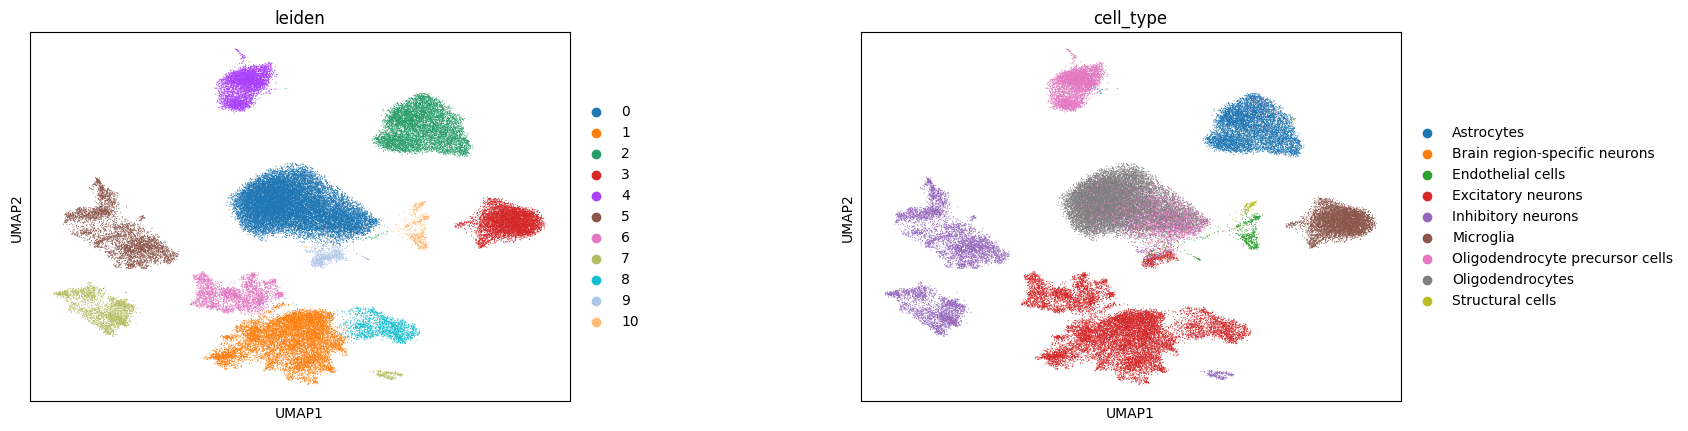

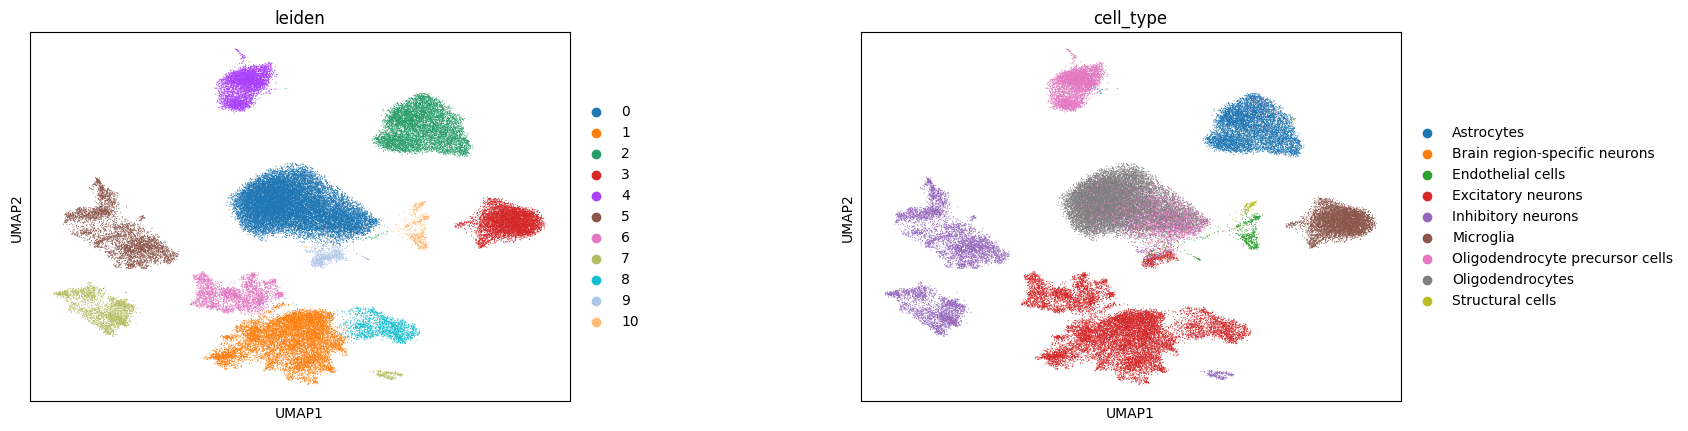

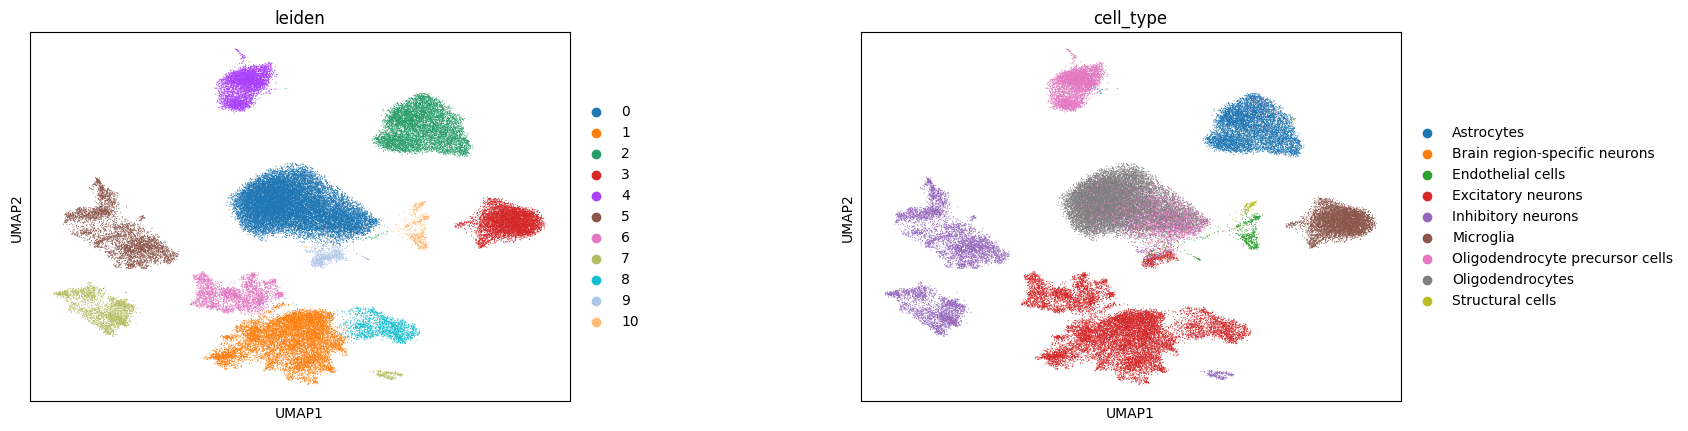

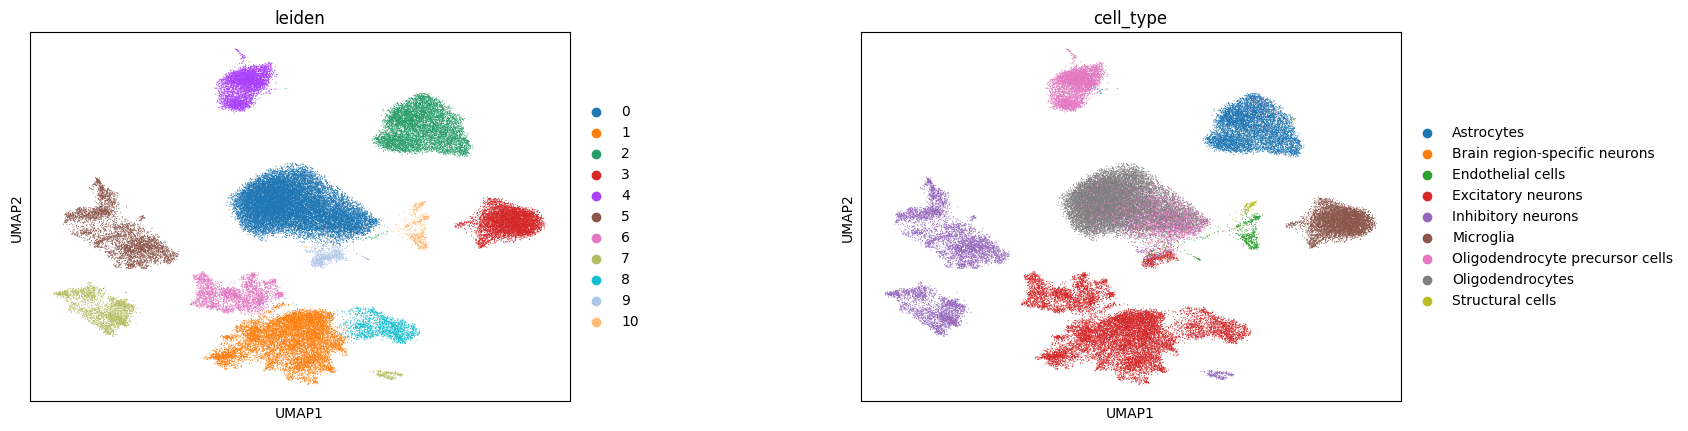

In [7]:
sc.pp.neighbors(adata, use_rep="X_scVI", n_neighbors=10)

for res in [0.2, 0.4, 0.6, 0.8, 1.0]:
    sc.tl.leiden(adata, resolution=res, key_added=f"leiden_r{res}")
    sc.tl.umap(adata)
    sc.pl.umap(adata, color=["leiden", "cell_type"], wspace=0.4)

In [8]:
adata.obs

sample_id  \
GSM4432645_GSM4432645_AAACCTGAGTCAATAG-1_GSM443...  GSM4432645   
GSM4432645_GSM4432645_AAACCTGGTTATCACG-1_GSM443...  GSM4432645   
GSM4432645_GSM4432645_AAACCTGTCAAGCCTA-1_GSM443...  GSM4432645   
GSM4432645_GSM4432645_AAACCTGTCTGACCTC-1_GSM443...  GSM4432645   
GSM4432645_GSM4432645_AAACCTGTCTGTCAAG-1_GSM443...  GSM4432645   
...                                                        ...   
GSM4432654_GSM4432654_TTTGTCATCATGTAGC-1_GSM443...  GSM4432654   
GSM4432654_GSM4432654_TTTGTCATCCACGTGG-1_GSM443...  GSM4432654   
GSM4432654_GSM4432654_TTTGTCATCTATCGCC-1_GSM443...  GSM4432654   
GSM4432654_GSM4432654_TTTGTCATCTCGCTTG-1_GSM443...  GSM4432654   
GSM4432654_GSM4432654_TTTGTCATCTCTGCTG-1_GSM443...  GSM4432654   

                                                               region  \
GSM4432645_GSM4432645_AAACCTGAGTCAATAG-1_GSM443...  Entorhinal cortex   
GSM4432645_GSM4432645_AAACCTGGTTATCACG-1_GSM443...  Entorhinal cortex   
GSM4432645_GSM4432645_AAACCTGTCAAGCCTA-1_GSM443...  Entorhinal cortex   
GSM4432645_GSM4432645_AAACCTGTCTGACCTC-1_GSM443...  Entorhinal cortex   
GSM4432645_GSM4432645_AAACCTGTCTGTCAAG-1_GSM443...  Entorhinal cortex   
...                                                               ...   
GSM4432654_GSM4432654_TTTGTCATCATGTAGC-1_GSM443...  Entorhinal cortex   
GSM4432654_GSM4432654_TTTGTCATCCACGTGG-1_GSM443...  Entorhinal cortex   
GSM4432654_GSM4432654_TTTGTCATCTATCGCC-1_GSM443...  Entorhinal cortex   
GSM4432654_GSM4432654_TTTGTCATCTCGCTTG-1_GSM443...  Entorhinal cortex   
GSM4432654_GSM4432654_TTTGTCATCTCTGCTG-1_GSM443...  Entorhinal cortex   

                                                         brain_region batch  \
GSM4432645_GSM4432645_AAACCTGAGTCAATAG-1_GSM443...  Entorhinal cortex     C   
GSM4432645_GSM4432645_AAACCTGGTTATCACG-1_GSM443...  Entorhinal cortex     C   
GSM4432645_GSM4432645_AAACCTGTCAAGCCTA-1_GSM443...  Entorhinal cortex     C   
GSM4432645_GSM4432645_AAACCTGTCTGACCTC-1_GSM443...  Entorhinal cortex     C   
GSM4432645_GSM4432645_AAACCTGTCTGTCAAG-1_GSM443...  Entorhinal cortex     C   
...                                                               ...   ...   
GSM4432654_GSM4432654_TTTGTCATCATGTAGC-1_GSM443...  Entorhinal cortex     D   
GSM4432654_GSM4432654_TTTGTCATCCACGTGG-1_GSM443...  Entorhinal cortex     D   
GSM4432654_GSM4432654_TTTGTCATCTATCGCC-1_GSM443...  Entorhinal cortex     D   
GSM4432654_GSM4432654_TTTGTCATCTCGCTTG-1_GSM443...  Entorhinal cortex     D   
GSM4432654_GSM4432654_TTTGTCATCTCTGCTG-1_GSM443...  Entorhinal cortex     D   

                                                    donor_id  braak_stage  \
GSM4432645_GSM4432645_AAACCTGAGTCAATAG-1_GSM443...         2            0   
GSM4432645_GSM4432645_AAACCTGGTTATCACG-1_GSM443...         2            0   
GSM4432645_GSM4432645_AAACCTGTCAAGCCTA-1_GSM443...         2            0   
GSM4432645_GSM4432645_AAACCTGTCTGACCTC-1_GSM443...         2            0   
GSM4432645_GSM4432645_AAACCTGTCTGTCAAG-1_GSM443...         2            0   
...                                                      ...          ...   
GSM4432654_GSM4432654_TTTGTCATCATGTAGC-1_GSM443...        10            6   
GSM4432654_GSM4432654_TTTGTCATCCACGTGG-1_GSM443...        10            6   
GSM4432654_GSM4432654_TTTGTCATCTATCGCC-1_GSM443...        10            6   
GSM4432654_GSM4432654_TTTGTCATCTCGCTTG-1_GSM443...        10            6   
GSM4432654_GSM4432654_TTTGTCATCTCTGCTG-1_GSM443...        10            6   

                                                     sex  age  \
GSM4432645_GSM4432645_AAACCTGAGTCAATAG-1_GSM443...  Male   60   
GSM4432645_GSM4432645_AAACCTGGTTATCACG-1_GSM443...  Male   60   
GSM4432645_GSM4432645_AAACCTGTCAAGCCTA-1_GSM443...  Male   60   
GSM4432645_GSM4432645_AAACCTGTCTGACCTC-1_GSM443...  Male   60   
GSM4432645_GSM4432645_AAACCTGTCTGTCAAG-1_GSM443...  Male   60   
...                                                  ...  ...   
GSM4432654_GSM4432654_TTTGTCATCATGTAGC-1_GSM443...  Ma

In [7]:
adata

AnnData object with n_obs × n_vars = 56037 × 2000
    obs: 'sample_id', 'region', 'brain_region', 'batch', 'donor_id', 'braak_stage', 'sex', 'age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'n_genes', 'solo_doublet', 'solo_singlet', '_scvi_batch', '_scvi_labels', 'supercluster_name', 'cell_type', 'leiden'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_mean_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'sample_id_colors'
    obsm: 'X_scVI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [8]:
import scanpy as sc
import numpy as np
from sklearn.metrics import adjusted_rand_score
import random

# # Step 1: Compute neighbors (if not already done)
# sc.pp.neighbors(adata, use_rep="X_scVI", n_neighbors=10)

# # Step 2: Leiden clustering at different resolutions
# resolutions = [0.2, 0.4, 0.6, 0.8, 1.0]
# for res in resolutions:
#     sc.tl.leiden(adata, resolution=res, key_added=f"leiden_r{res}")

# Step 3: Choose one resolution for downstream use (e.g., 0.4)
cluster_key = "leiden"
adata.obs["final_clusters"] = adata.obs[cluster_key]

# Step 4: Bootstrap clustering stability
# Repeat clustering on 100 bootstrapped subsamples and compare ARI
n_bootstraps = 100
bootstrap_ari = []

cells = adata.obs_names.to_list()
true_labels = adata.obs["final_clusters"].to_list()

for i in range(n_bootstraps):
    # Sample 80% of cells without replacement
    sampled_cells = random.sample(cells, int(len(cells) * 0.8))
    adata_sub = adata[sampled_cells].copy()

    sc.pp.neighbors(adata_sub, use_rep="X_scVI", n_neighbors=10)
    sc.tl.leiden(adata_sub, resolution=0.4, key_added="bootstrap_leiden")

    # Compute ARI between the bootstrap clustering and original labels
    labels_boot = adata_sub.obs["bootstrap_leiden"]
    labels_ref = adata.obs.loc[sampled_cells, "final_clusters"]
    
    ari = adjusted_rand_score(labels_ref, labels_boot)
    bootstrap_ari.append(ari)

# Summarize ARI scores
mean_ari = np.mean(bootstrap_ari)
std_ari = np.std(bootstrap_ari)

print(f"Bootstrap clustering ARI: mean = {mean_ari:.3f}, std = {std_ari:.3f}")


Bootstrap clustering ARI: mean = 0.990, std = 0.002


In [10]:
bootstrap_ari

[0.9889647553931231,
 0.9890091584735944,
 0.9901834093053944,
 0.9898495184166667,
 0.9923911809420727,
 0.9895317124272213,
 0.9902723263050552,
 0.9901139664712831,
 0.9894390506932762,
 0.9907104548739817,
 0.9903967844131915,
 0.988568050488252,
 0.989498925522457,
 0.9902952072987744,
 0.9903252361624764,
 0.990315313204392,
 0.9910677109741838,
 0.9897071468683754,
 0.9903314541084779,
 0.9904418176012729,
 0.9897267796398215,
 0.9895744893294617,
 0.9901462205831846,
 0.9903573844057609,
 0.9912845016928454,
 0.9900754944167113,
 0.9892733536953299,
 0.9905249333804588,
 0.9815860366925858,
 0.9927458365161541,
 0.9902093380677252,
 0.9895017023611595,
 0.9891893617792378,
 0.9899736670788901,
 0.9909075340084615,
 0.990230141128267,
 0.989440227626643,
 0.9900363869684957,
 0.9902621804045592,
 0.988397686785145,
 0.9895281915839546,
 0.9893651677716412,
 0.989567266038231,
 0.9898163173949373,
 0.9825967925412901,
 0.991757788614902,
 0.9884122035045111,
 0.9902116813555375,


## Silhouette Scores per Cluster

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Compute silhouette scores (you can use 'X_scVI' or 'X_umap')
X = adata.obsm["X_scVI"]  # or "X_pca" or "X_umap"
labels = adata.obs["leiden"]  # change key as needed

# Global silhouette score (mean over all cells)
silhouette_avg = silhouette_score(X, labels)
print(f"Global silhouette score: {silhouette_avg:.3f}")

# Per-cell silhouette scores (for plotting later)
adata.obs["silhouette_score"] = silhouette_samples(X, labels)


Global silhouette score: 0.172


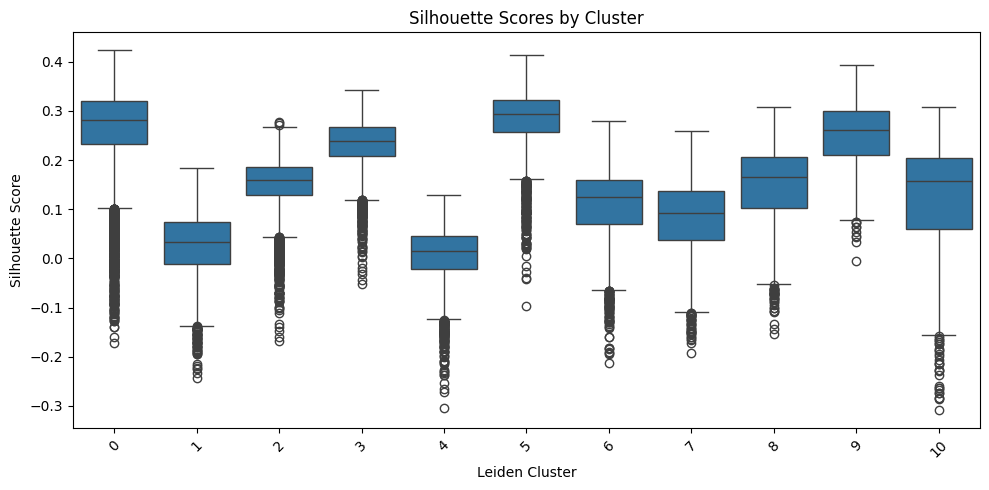

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x="leiden_r0.4", y="silhouette_score", data=adata.obs)
plt.title("Silhouette Scores by Cluster")
plt.xlabel("Leiden Cluster")
plt.ylabel("Silhouette Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Batch Mixing Entropy

C:\Users\D_F\AppData\Local\Temp\ipykernel_17692\27126198.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby("leiden_r0.4").apply(compute_entropy)
C:\Users\D_F\AppData\Local\Temp\ipykernel_17692\27126198.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  adata.obs.groupby("leiden_r0.4").apply(compute_entropy)


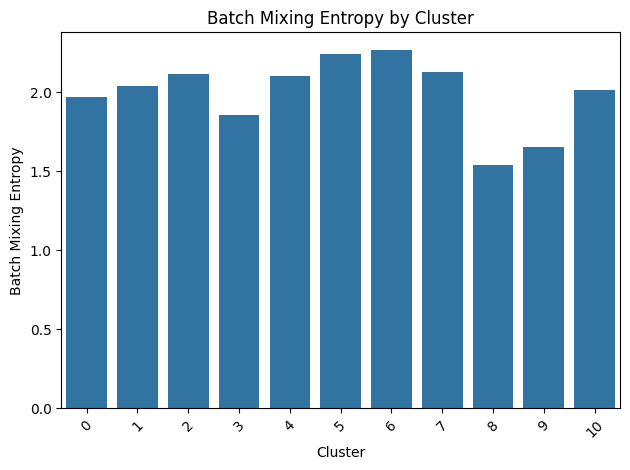

In [12]:
from scipy.stats import entropy
import numpy as np
import pandas as pd

# Assuming 'sample_id' identifies donors or batches
def compute_entropy(group):
    probs = group["sample_id"].value_counts(normalize=True)
    return entropy(probs)

entropy_per_cluster = (
    adata.obs.groupby("leiden_r0.4").apply(compute_entropy)
)

# Save to DataFrame and plot
entropy_df = entropy_per_cluster.reset_index()
entropy_df.columns = ["Cluster", "Batch Mixing Entropy"]

sns.barplot(x="Cluster", y="Batch Mixing Entropy", data=entropy_df)
plt.title("Batch Mixing Entropy by Cluster")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
import scanpy as sc
import matplotlib.pyplot as plt

# Run neighbors and UMAP
sc.pp.neighbors(adata, use_rep="X_scVI", n_neighbors=10)
sc.tl.umap(adata)

# Leiden clustering
sc.tl.leiden(adata, resolution=0.4, key_added="leiden")



C:\Users\D_F\AppData\Local\Temp\ipykernel_5452\1788072939.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.4, key_added="leiden")


In [4]:
# Create high-resolution PDF plots with adjusted layout
sc.pl.umap(
    adata,
    color=["leiden"],
    wspace=0.4,
    frameon=False,          # cleaner look
    size=25,                # larger dots for clarity
    show=False              # prevents auto-display so we can save manually
)

# Save figure as high-quality PDF
plt.savefig("umap_clusters_publication_ready.pdf", dpi=300, bbox_inches="tight")
plt.close()


In [5]:
# Create high-resolution PDF plots with adjusted layout
sc.pl.umap(
    adata,
    color=["sample_id"],
    wspace=0.4,
    frameon=False,          # cleaner look
    size=25,                # larger dots for clarity
    show=False              # prevents auto-display so we can save manually
)

# Save figure as high-quality PDF
plt.savefig("umap_clusters_sample_id_publication_ready.pdf", dpi=300, bbox_inches="tight")
plt.close()


## Plot ari score

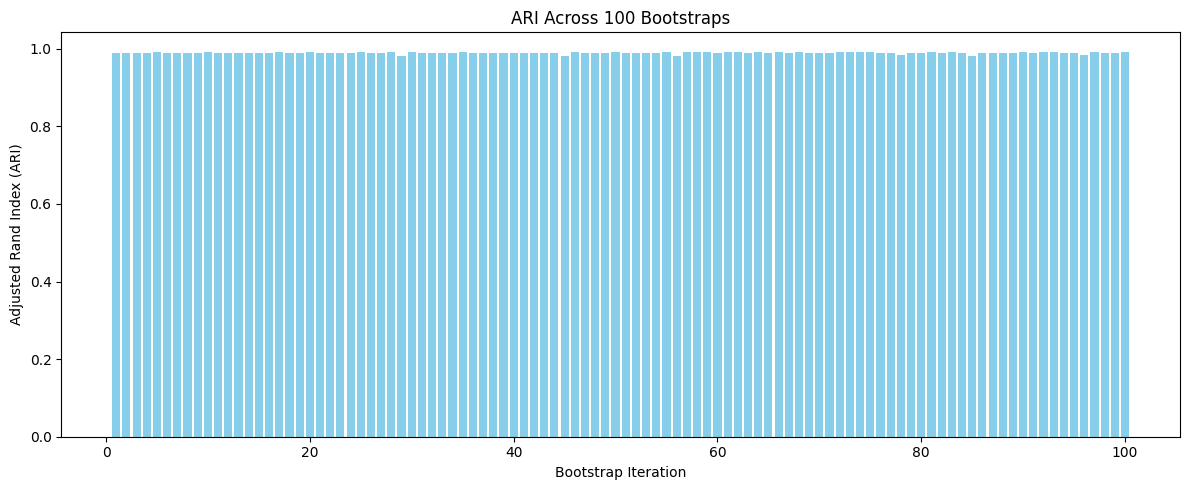

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(range(1, 101), bootstrap_ari, color='skyblue')
plt.xlabel("Bootstrap Iteration")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("ARI Across 100 Bootstraps")
plt.tight_layout()
plt.savefig("ari_bootstraps_barplot.pdf", dpi=300)
plt.show()


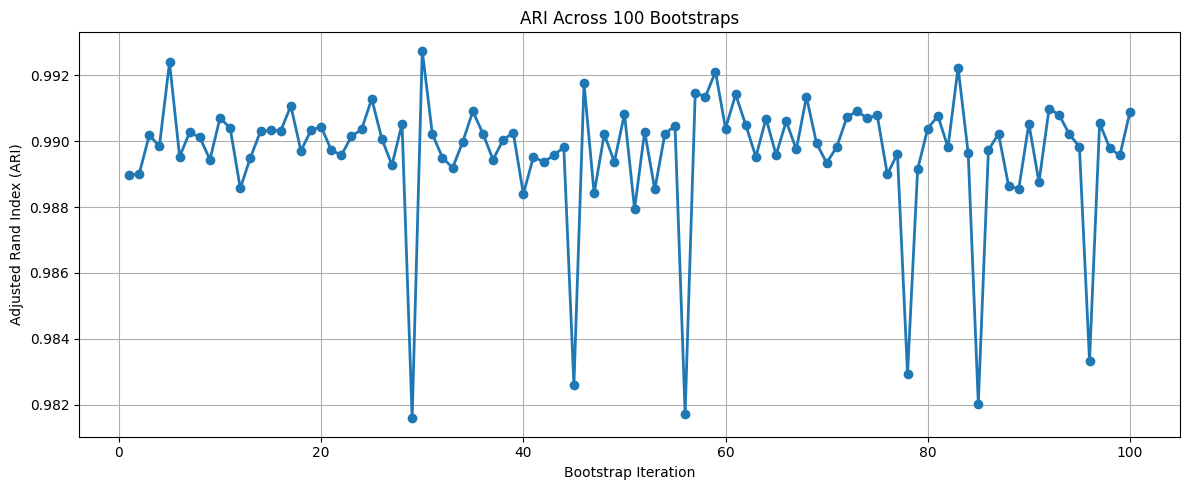

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 101), bootstrap_ari, marker='o', linewidth=2)
plt.xlabel("Bootstrap Iteration")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("ARI Across 100 Bootstraps")
plt.grid(True)
plt.tight_layout()
plt.savefig("ari_bootstraps_lineplot.pdf", dpi=300)
plt.show()


In [13]:
import matplotlib.pyplot as plt

# Sample input (replace with your actual data)
# ari_scores = [0.82, 0.84, ..., 0.79]  # length = 100

plt.figure(figsize=(10, 4))
plt.plot(range(1, 101), bootstrap_ari, marker='o', markersize=4, linewidth=2, color='black')
plt.xlabel("Bootstrap Iteration", fontsize=14)
plt.ylabel("Adjusted Rand Index (ARI)", fontsize=14)
plt.title("ARI Across 100 Bootstrap Iterations", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save as high-quality PDF
plt.savefig("ari_bootstraps_publication_ready.pdf", dpi=300, bbox_inches="tight")
plt.close()


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Create boxplot with clean aesthetics
sns.boxplot(
    x="leiden", 
    y="silhouette_score", 
    data=adata.obs,
    palette="Set2",  # optional: change color scheme
    linewidth=1.5
)

# Title and labels
plt.title("Silhouette Scores by Leiden Cluster", fontsize=16)
plt.xlabel("Leiden Cluster", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Layout and save
plt.tight_layout()
plt.savefig("silhouette_by_cluster_publication_ready.pdf", dpi=300, bbox_inches="tight")
plt.close()


C:\Users\D_F\AppData\Local\Temp\ipykernel_5452\2046432256.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


In [18]:
from scipy.stats import entropy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute batch mixing entropy per cluster
def compute_entropy(group):
    probs = group["sample_id"].value_counts(normalize=True)
    return entropy(probs)

entropy_per_cluster = (
    adata.obs.groupby("leiden").apply(compute_entropy)
)

# Format as DataFrame
entropy_df = entropy_per_cluster.reset_index()
entropy_df.columns = ["Cluster", "Batch Mixing Entropy"]

# Plot with publication-level style
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Cluster", 
    y="Batch Mixing Entropy", 
    data=entropy_df,
    palette="Set2",
    edgecolor="black"
)

plt.title("Batch Mixing Entropy by Cluster", fontsize=16)
plt.xlabel("Leiden Cluster", fontsize=14)
plt.ylabel("Batch Mixing Entropy", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig("batch_entropy_by_cluster_publication_ready.pdf", dpi=300, bbox_inches="tight")
plt.close()


C:\Users\D_F\AppData\Local\Temp\ipykernel_5452\4239099071.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby("leiden").apply(compute_entropy)
C:\Users\D_F\AppData\Local\Temp\ipykernel_5452\4239099071.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  adata.obs.groupby("leiden").apply(compute_entropy)
C:\Users\D_F\AppData\Local\Temp\ipykernel_5452\4239099071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

## Anotated Plot

In [20]:
import scanpy as sc
import matplotlib.pyplot as plt
import os

# Output path
output_dir = "figures/annotation"
os.makedirs(output_dir, exist_ok=True)

# -----------------------------
# UMAP colored by cell type
# -----------------------------
sc.pl.umap(
    adata,
    color="cell_type",
    palette=sc.pl.palettes.default_20,
    title="UMAP - Annotated Cell Types",
    frameon=False,
    legend_loc='on data',
    show=False  # Don't show yet
)

# Save manually as both PDF and PNG
plt.savefig(os.path.join(output_dir, "umap_annotated_supercluster.pdf"), format="pdf", bbox_inches="tight")
plt.savefig(os.path.join(output_dir, "umap_annotated_supercluster.png"), format="png", dpi=300, bbox_inches="tight")
plt.close()

# -----------------------------------------
# 2. Boxplot: Cell-type frequency by Braak
# -----------------------------------------
# Prepare data for boxplot
freq_data = (
    adata.obs.groupby(["braak_stage", "cell_type"])
    .size()
    .reset_index(name="count")
)
# Normalize within donor
donor_counts = adata.obs.groupby("sample_id").size().reset_index(name="total")
freq_data = freq_data.merge(adata.obs[["braak_stage", "cell_type", "sample_id"]], on=["braak_stage", "cell_type"], how="left").drop_duplicates()
freq_data = freq_data.merge(donor_counts, on="sample_id", how="left")
freq_data["frequency"] = freq_data["count"] / freq_data["total"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=freq_data, x="cell_type", y="frequency", hue="braak_stage")
plt.xticks(rotation=45, ha="right")
plt.title("Cell-Type Frequencies by Braak Stage")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "celltype_frequency_by_stage.pdf"))
plt.savefig(os.path.join(output_dir, "celltype_frequency_by_stage.png"))
plt.close()


C:\Users\D_F\AppData\Local\Temp\ipykernel_5452\4220259938.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(["braak_stage", "cell_type"])
C:\Users\D_F\AppData\Local\Temp\ipykernel_5452\4220259938.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  donor_counts = adata.obs.groupby("sample_id").size().reset_index(name="total")


In [21]:
import scanpy as sc
import matplotlib.pyplot as plt
import os

# Set output directory
output_dir = "figures/annotation"
os.makedirs(output_dir, exist_ok=True)

# Create UMAP with side legend (not on the clusters)
sc.pl.umap(
    adata,
    color="cell_type",
    palette=sc.pl.palettes.default_20,
    title="UMAP - Annotated Cell Types",
    frameon=False,
    legend_loc='right margin',  # <-- Side legend here
    legend_fontsize='small',
    legend_fontoutline=1,
    show=False
)

# Save high-res output
plt.savefig(os.path.join(output_dir, "umap_annotated_supercluster_sidelegend.pdf"), format="pdf", bbox_inches="tight")
plt.savefig(os.path.join(output_dir, "umap_annotated_supercluster_sidelegend.png"), format="png", dpi=300, bbox_inches="tight")
plt.close()


In [22]:
import pandas as pd

# Replace 'cell_type' with the actual column in your adata.obs where annotations are stored
cell_type_counts = adata.obs['cell_type'].value_counts().sort_values(ascending=False)

# Convert to DataFrame for easy display and export
cell_type_counts_df = cell_type_counts.reset_index()
cell_type_counts_df.columns = ['Cell Type', 'Number of Cells']

# Display
print(cell_type_counts_df)

# Save to CSV (optional)
cell_type_counts_df.to_csv("cell_type_counts.csv", index=False)


                         Cell Type  Number of Cells
0               Excitatory neurons            14138
1                 Oligodendrocytes            14073
2  Oligodendrocyte precursor cells             8330
3               Inhibitory neurons             6756
4                       Astrocytes             6636
5                        Microglia             5381
6                Endothelial cells              537
7                 Structural cells              153
8    Brain region-specific neurons               33


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Assume cell_type_counts_df is already created
# If not, regenerate from adata:
# cell_type_counts_df = adata.obs['cell_type'].value_counts().sort_values(ascending=False).reset_index()
# cell_type_counts_df.columns = ['Cell Type', 'Number of Cells']

output_dir = "figures/annotation"
os.makedirs(output_dir, exist_ok=True)

# ----- Barplot -----
plt.figure(figsize=(10, 6))
sns.barplot(
    data=cell_type_counts_df,
    x='Number of Cells',
    y='Cell Type',
    palette='muted'
)
plt.title("Cell Count per Annotated Cell Type")
plt.xlabel("Number of Cells")
plt.ylabel("Cell Type")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "celltype_barplot.pdf"))
plt.savefig(os.path.join(output_dir, "celltype_barplot.png"), dpi=300)
plt.close()

# ----- Pie Chart -----
plt.figure(figsize=(8, 8))
plt.pie(
    cell_type_counts_df['Number of Cells'],
    labels=cell_type_counts_df['Cell Type'],
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Cell Type Distribution (Pie Chart)")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "celltype_piechart.pdf"))
plt.savefig(os.path.join(output_dir, "celltype_piechart.png"), dpi=300)
plt.close()


C:\Users\D_F\AppData\Local\Temp\ipykernel_5452\3375432112.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
